## Meta-analytic methods and features

### 1. Introduction
In the previous example the outcome variable was continuous. As a consequence, two different effect measures can be used, namely "mean difference" and "standardized mean difference". The former is used when all studies included in a meta-analysis reported the outcome variable in the same scale, thereby providing a direct overall effect measure. Contrarily, the latter is used when the outcome variable was measured on different scales, which is most often the case. In this context, a standardized measure of the outcome variable is obtained. Although several methods to standardize mean differences are available, a commonly used one consists on dividing the mean difference by the standard deviation of either the control group or the whole data set. The argument `sm` defines the kind of mean difference that we aim for. 

We first need to read the data and import the libraries

In [1]:
#######################################################
## Specify R environment for rpy2
import os
os.environ['R_HOME'] = r'C:\Program Files\R\R-4.4.3'  # Replace with your R path
import rpy2.robjects as ro
from rpy2.robjects import pandas2ri
from rpy2.robjects.packages import importr
from rpy2.robjects import Formula
import contextlib
# Ipython extension for plotting
%load_ext rpy2.ipython
########################################################

import pandas as pd

# Read the CSV file
pre_data = pd.read_csv(f"../Meta_Analysis/Datasets/dataset02.csv")

# Rename columns 2 to 7
pre_data.columns.values[1:7] = ["n_exp", "mean_exp", "std_exp", "n_con", "mean_con", "std_con"]

# Add a new column 'duration' with values based on the number of rows
pre_data["duration"] = ["> 2 weeks"] * 8 + ["< 2 weeks"] * 9

# Display the first few rows of the dataframe
print(pre_data.head())

             author  n_exp  mean_exp  std_exp  n_con  mean_con  std_con  \
0   Blashki(75%150)     13       6.4      5.4     18      11.4      9.6   
1    Hormazabal(86)     17      11.0      8.2     16      19.0      8.2   
2  Jacobson(75-100)     10      17.5      8.8      6      23.0      8.8   
3       Jenkins(75)      7      12.3      9.9      7      20.0     10.5   
4    Lecrubier(100)     73      15.7     10.6     73      18.7     10.6   

    duration  
0  > 2 weeks  
1  > 2 weeks  
2  > 2 weeks  
3  > 2 weeks  
4  > 2 weeks  


c:\Users\danie\Documents\envPython\psy112\lib\site-packages\rpy2\robjects\packages.py:367: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(


### 2. Meta-analysis with standardized mean difference

We use the next code chunk to re-run the meta-analysis, this time specifying that the standardized mean differences should be considered (`sm`="SMD") and  plot a forest graph. Name the new object "m2".

All the effects estimates and the header specifying our used effect measure (SMD) are different now. This is due to the different scales used across studies to measure the outcome variable. You can use the `summary()` function to obtain output from a meta-analytic procedure. 

In [2]:
# Activate pandas2ri for automatic conversion
pandas2ri.activate()

# Import the meta package in R
ro.r('library(meta)')

# Put the pre_data DataFrame into the R environment
ro.globalenv['pre_data'] = pandas2ri.py2rpy(pre_data)

# Perform the meta-analysis using metacont
ro.r('''
m2 <- metacont(n_exp, mean_exp, std_exp, 
              n_con, mean_con, std_con, 
              studlab = author, data = pre_data, sm = "SMD")
''')

# Print the summary of the meta-analysis
summary = ro.r('summary(m2)')
print(summary)

R[write to console]: Loading required package: metadat

R[write to console]: Loading 'meta' package (version 8.0-2).
Type 'help(meta)' for a brief overview.



                      SMD             95%-CI %W(common) %W(random)
Blashki(75%150)   -0.5990 [-1.3299;  0.1319]        3.5        5.8
Hormazabal(86)    -0.9518 [-1.6767; -0.2268]        3.6        5.8
Jacobson(75-100)  -0.5908 [-1.6296;  0.4480]        1.7        4.5
Jenkins(75)       -0.7062 [-1.7975;  0.3850]        1.6        4.3
Lecrubier(100)    -0.2815 [-0.6076;  0.0445]       17.6        7.5
Murphy(100)       -0.5375 [-1.0816;  0.0065]        6.3        6.6
Nandi(97)         -1.3204 [-2.1888; -0.4520]        2.5        5.2
Petracca(100)     -0.4800 [-1.3512;  0.3913]        2.5        5.2
Philipp(100)       0.0918 [-0.2549;  0.4385]       15.6        7.5
Rampello(100)     -3.2433 [-4.2020; -2.2846]        2.0        4.8
Reifler(83)        0.0000 [-0.7427;  0.7427]        3.4        5.7
Rickels(70)       -0.7061 [-1.2020; -0.2103]        7.6        6.9
Robertson(75)     -0.4724 [-1.2536;  0.3088]        3.1        5.6
Rouillon(98)      -0.1849 [-0.5071;  0.1372]       18.0       

### . Graphical Output

A very characteristic plot summarizing meta-analytic results is known as the "forest plot". In such a figure, study-specific estimates are displayed, along with fixed and random effects (to be explained later). 

We use the next code chunk to plot a "forest plot" by fitting the object "m" into the `forest()` function:


In [3]:
%%R

# Save the forest plot as a PNG file with larger dimensions
png("../Meta_Analysis/Datasets/forest_plot2.png", width = 2000, height = 800, res = 150)

# Generate the forest plot
forest(m2)

# Close the PNG device
dev.off()

png 
  2 


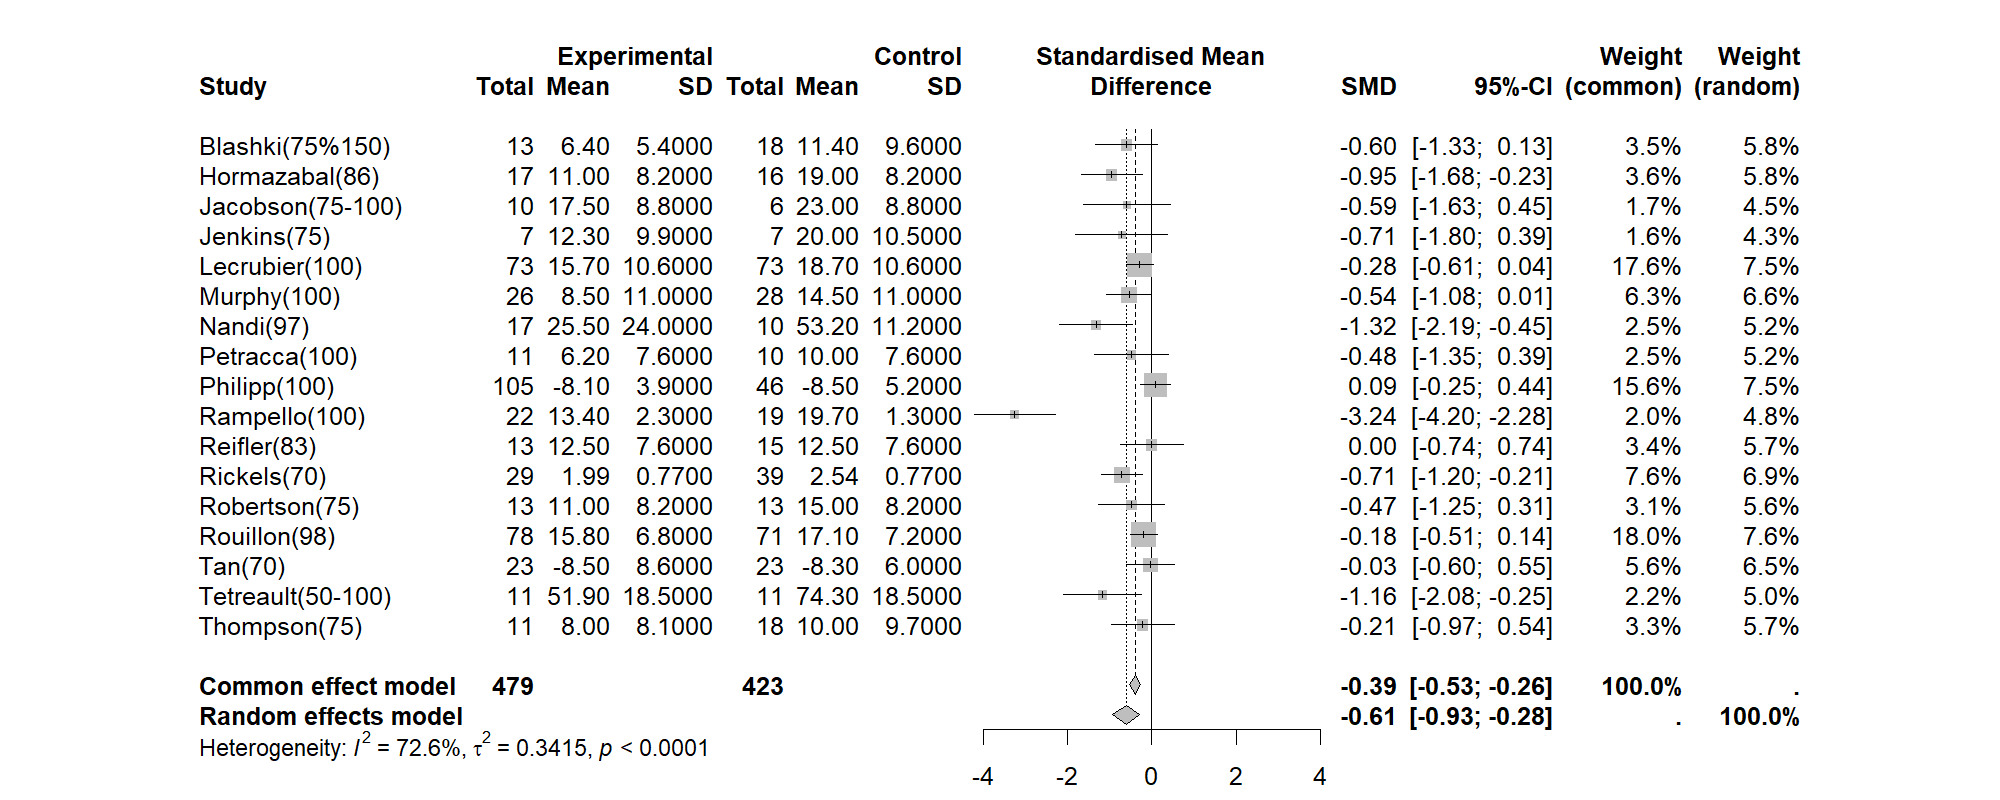

In [4]:
# show the plot
from IPython.display import Image, display

# Display the saved plot
display(Image(filename="../Meta_Analysis/Datasets/forest_plot2.png"))


### 3. Interpretation

The interpretation is very similar to the one from the forest plot, with the difference that now instead of the study-specific statistics, we have only the overall fixed (common) and random effects, this time with z-scores and significance levels. 

Regarding the heterogeneity, keep in mind that $\ I^2$ is a scaled version of H. Lastly, a list of the methods is provided which were employed for estimating different statistics. In this case, the most relevant for us is: 

* Inverse variance method to estimate the overall effects: The inverse variance method is the most widely and generally used method to estimate overall effects. It is calculated as a weighted estimation of the inverse of the variance of the studies included in the meta-analysis. That is, individual studies with higher precision (larger sample sizes and therefore lower standard error) will be given a higher weight in the estimation of an overall effect. This is the case for both fixed and random effect models. The main difference between them, is that under a random effect model, between-study in addition to within-study variance is also considered. 

Let us now briefly understand the two overall effect measures:

### 4. Fixed effect model

The fixed or common effect model considers all the estimated effects from the studies included in a meta-analysis as coming from a single homogeneous population in which a single true underlying effect exists. As a result, variance in studies' results are attributed to sampling error. Furthermore, in order to estimate an overall effect, single-study estimates are directly averaged while considering that some of them are more precise given that they come from larger studies.   

The fixed effect estimate is provided at the bottom of the forest plot, along with its 95% confidence intervals. You can also use the next code to visualize it and the standard error: 


In [6]:
# Perform the meta-analysis using metacont
fixed_est = ro.r('''
                 library(tidyverse)
                 c(m2$TE.fixed, m2$seTE.fixed^2) %>% round(., 4)
''')

# Print the summary of the meta-analysis
print(fixed_est)

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.5
v forcats   1.0.0     v stringr   1.5.1
v ggplot2   3.5.1     v tibble    3.2.1
v lubridate 1.9.4     v tidyr     1.3.1
v purrr     1.0.4     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
[-0.3918  0.0049]


### 5. Random effect model

Contrary to the fixed effect model, the random effect model assumes that studies included in a meta-analysis are considerably heterogeneous. This is because it is assumed that not only one, but several true effects exist in the population. As a consequence, differences in study results are due to sampling error and different true effects present in the different populations. When estimating overall effects based on a random effect model, more attention to individual studies will be paid irrespective of their sample sizes. Given that under this model more variance is assumed, the resulting confidence intervals will be often wider than those of the fixed effect model. This represents one of the core discussions in meta-analytic literature as both random and fixed effect will have consequences on the statistical inferences and conclusions. 

In any case, this statistics is an overall effect measure, that provides a statistical summary of several studies on a given topic. This is the main difference of conducting a meta-analysis in comparison with other data-summarizing methods, such as reviews or systematic reviews. 


In [7]:
# Perform the meta-analysis using metacont
random_est = ro.r('''
                 library(tidyverse)
                 c(m2$TE.random, m2$seTE.random^2) %>% round(., 4)
''')

# Print the summary of the meta-analysis
print(random_est)

[-0.6056  0.0278]


### 6. Prediction intervals 

The 95% confidence intervals are printed when using the `summary()` function. These can be graphically visualized in a forest plot too.
Add the the "prediction=TRUE" argument to `forest()` function call to visualize the 95% confidence intervals. You can additionally change their color (e.g., col.predict="red")


In [8]:
%%R

# Save the forest plot as a PNG file with larger dimensions
png("../Meta_Analysis/Datasets/forest_plot2_pred.png", width = 2000, height = 800, res = 150)

# Generate the forest plot
forest(m2, prediction=TRUE, col.predict="red")

# Close the PNG device
dev.off()

png 
  2 


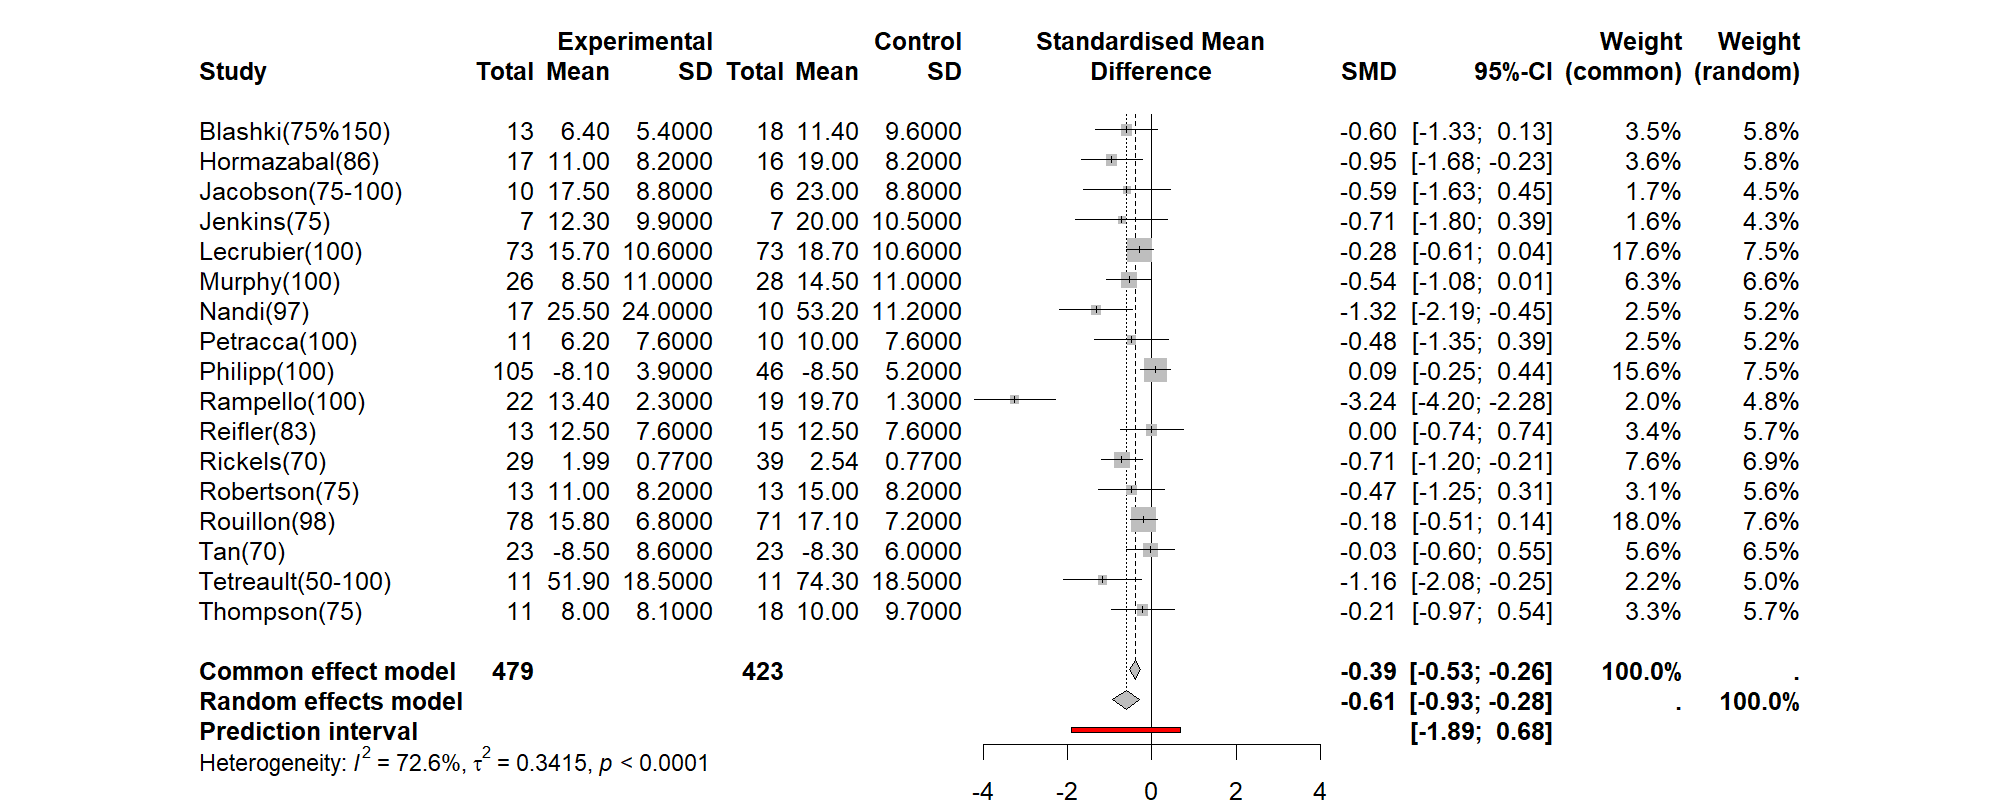

In [9]:
# show the plot
from IPython.display import Image, display

# Display the saved plot
display(Image(filename="../Meta_Analysis/Datasets/forest_plot2_pred.png"))

### 7. Subgroup analysis

In evaluation research it is often the case that we want to analyze studies that share a particular characteristic. For example, our data frame `pre_data` contains another variable ("duration") specifying whether the novel therapy was received for less or more that 2 weeks. We can conduct separate meta-analysis based on this variable by specifying the `byvar` argument:

In [11]:
# Perform the meta-analysis using metacont
ro.r('''
        m3 <- metacont(n_exp, mean_exp, std_exp, n_con, mean_con, std_con, studlab=author,
        subgroup=duration, data=pre_data, sm = "SMD")
''')

# Or, we can also use a straightforward way: to modify the previous object m2:
# m3 = ro.r('''
#             update(m2, subgroup=duration, print.subgroup.name=FALSE)
# ''')

# Print the summary of the meta-analysis
summary_m3 = ro.r('summary(m3)')
print(summary_m3)

                      SMD             95%-CI %W(common) %W(random)  duration
Blashki(75%150)   -0.5990 [-1.3299;  0.1319]        3.5        5.8 > 2 weeks
Hormazabal(86)    -0.9518 [-1.6767; -0.2268]        3.6        5.8 > 2 weeks
Jacobson(75-100)  -0.5908 [-1.6296;  0.4480]        1.7        4.5 > 2 weeks
Jenkins(75)       -0.7062 [-1.7975;  0.3850]        1.6        4.3 > 2 weeks
Lecrubier(100)    -0.2815 [-0.6076;  0.0445]       17.6        7.5 > 2 weeks
Murphy(100)       -0.5375 [-1.0816;  0.0065]        6.3        6.6 > 2 weeks
Nandi(97)         -1.3204 [-2.1888; -0.4520]        2.5        5.2 > 2 weeks
Petracca(100)     -0.4800 [-1.3512;  0.3913]        2.5        5.2 > 2 weeks
Philipp(100)       0.0918 [-0.2549;  0.4385]       15.6        7.5 < 2 weeks
Rampello(100)     -3.2433 [-4.2020; -2.2846]        2.0        4.8 < 2 weeks
Reifler(83)        0.0000 [-0.7427;  0.7427]        3.4        5.7 < 2 weeks
Rickels(70)       -0.7061 [-1.2020; -0.2103]        7.6        6.9 < 2 weeks

As can be seen in the output below, when adding a `subgroup = variable of interest` argument, `metacon()` will estimate group-specific statistics including mean differences and overall effects. Importantly, between- and within-group heterogeneity is now available. These estimates provide information as to whether the significant heterogeneity in the whole study population (58.38, p < 0.0001) arises from within the groups or whether it depends on our grouping variable (duration). In this case, the duration of the novel therapy does not seem to be the main cause of the significant study heterogeneity, as the between-group estimates for both fixed and random effects are not significant: 2.20, p = 0.1376 and 0.01, p = 0.9348 respectively.  

### 8. Future directions

As mentioned before, this tutorial provides only a very basic set of tools that can be used to perform simple meta-analysis. As it is often the case with research methods, there is much more to it. For instance, you could further learn how to treat outcome variables expressed in odds, or discrete scales. Furthermore, here we treated already summarized data. If you conduct a meta-analysis from scratch, a thorough and rigorous literature search process must precede. Covering this fundamental part of the meta-analytic procedure is beyond the scope of this tutorial but know that there are also R tools that can be used to make your life easier when coding the primary studies.  The  `metaverse` set of packages represents a great tool for these purposes. 